# Optimal Clustering 

In [1]:
%load_ext autoreload 
%autoreload 2
%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import sys
sys.path.append('../')

In [4]:
import random
import pandas as pd
import numpy as np

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from statsmodels.discrete.discrete_model import Logit 

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [7]:
import matplotlib.pyplot as plt

In [8]:
from ml4am.feature_importance import generate_classification_data
from ml4am.feature_importance import feat_importance_mdi
from ml4am.feature_importance import feat_imp_mda
from ml4am.optimal_clustering import clusterKMeansBase
from ml4am.ONC import ONC

In [9]:
 

# Generate test data
X, y = generate_classification_data(n_features=40, n_informative=5, n_redundant=30, n_samples=10000, sigma_std=.1)

# Fit logistic regression model
ols = Logit(y, X).fit()
# ols = Logit(y, X).fit_regularized(alpha=0.1, method='l1')

Optimization terminated successfully.
         Current function value: 0.380271
         Iterations 7


In [10]:
ols.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Method:           MLE      
Dependent Variable: y                Pseudo R-squared: 0.451    
Date:               2024-05-01 17:36 AIC:              7685.4295
No. Observations:   10000            BIC:              7973.8432
Df Model:           39               Log-Likelihood:   -3802.7  
Df Residuals:       9960             LL-Null:          -6931.5  
Converged:          1.0000           LLR p-value:      0.0000   
No. Iterations:     7.0000           Scale:            1.0000   
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
I_0       1.5619     0.8143    1.9180   0.0551   -0.0342    3.1579
I_1      -2.3691     0.7087   -3.3427   0.0008   -3.7582   -0.9800
I_2       0.8641     0.5037    1.7154   0.0863   -0.1232    1.8513
I_3       1.8296     0.8597    2.1282   0.0333    0.1446    3.5145
I_4      -0.4776     0.5675   -0.8416   0.4000   -1.5899    0.6347
N_0       0.0244     0.0285    0.8569   0.3915   -0.0314    0.0802
N_1      -0.0485     0.0290   -1.6712   0.0947   -0.1054    0.0084
N_2       0.0367     0.0291    1.2619   0.2070   -0.0203    0.0938
N_3      -0.0205     0.0290   -0.7059   0.4803   -0.0773    0.0364
N_4      -0.0421     0.0289   -1.4591   0.1445   -0.0986    0.0145
R_0       0.0271     0.2868    0.0945   0.9247   -0.5351    0.5893
R_1      -0.0619     0.2863   -0.2161   0.8289   -0.6229    0.4992
R_2       0.1759     0.2857    0.6157   0.5381   -0.3841    0.7359
R_3      -0.3816     0.2878   -1.3259   0.1849   -0.9456    0.1825
R_4      -0.0886     0.2889   -0.3067   0.7591   -0.6549    0.4776
R_5       0.0035     0.2856    0.0121   0.9903   -0.5563    0.5633
R_6      -0.1685     0.2873   -0.5867   0.5574   -0.7316    0.3945
R_7      -0.0064     0.2874   -0.0223   0.9822   -0.5696    0.5568
R_8      -0.3122     0.2892   -1.0796   0.2803   -0.8790    0.2546
R_9      -0.4787     0.2925   -1.6369   0.1017   -1.0520    0.0945
R_10     -0.2420     0.2882   -0.8396   0.4011   -0.8069    0.3229
R_11      0.2955     0.2857    1.0342   0.3010   -0.2645    0.8555
R_12     -0.0285     0.2963   -0.0960   0.9235   -0.6093    0.5523
R_13      0.3914     0.2878    1.3602   0.1738   -0.1726    0.9555
R_14     -0.2370     0.2900   -0.8171   0.4138   -0.8054    0.3314
R_15      0.1278     0.2916    0.4384   0.6611   -0.4437    0.6993
R_16     -0.1507     0.2899   -0.5198   0.6032   -0.7188    0.4175
R_17     -0.5064     0.2883   -1.7567   0.0790   -1.0714    0.0586
R_18      0.2050     0.2881    0.7115   0.4768   -0.3597    0.7696
R_19     -0.0950     0.2879   -0.3300   0.7414   -0.6594    0.4693
R_20     -0.2437     0.2862   -0.8513   0.3946   -0.8047    0.3174
R_21     -0.0479     0.2934   -0.1634   0.8702   -0.6229    0.5271
R_22      0.1300     0.2874    0.4522   0.6511   -0.4334    0.6933
R_23      0.4978     0.2906    1.7131   0.0867   -0.0717    1.0672
R_24     -0.2049     0.2903   -0.7060   0.4802   -0.7739    0.3640
R_25     -0.0985     0.2890   -0.3408   0.7332   -0.6650    0.4680
R_26     -0.2239     0.2885   -0.7759   0.4378   -0.7894    0.3416
R_27      0.6949     0.2888    2.4060   0.0161    0.1288    1.2610
R_28     -0.2979     0.2914   -1.0224   0.3066   -0.8691    0.2732
R_29     -0.7999     0.2913   -2.7459   0.0060   -1.3709   -0.2290
================================================================

"""

In [11]:
pvalues_series = ols.pvalues.sort_values(ascending=True)

Text(0, 0.5, 'p-values')

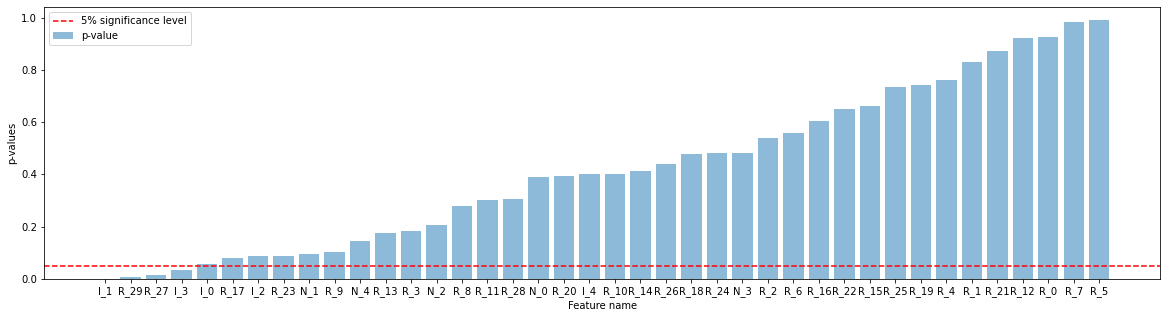

In [12]:
plt.figure(figsize=(20, 5))
plt.bar(pvalues_series.index, pvalues_series.values, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.axhline(y=0.05, color='r', linestyle='--')  # Add horizontal line at y=0.05
plt.legend(['5% significance level', 'p-value'])
plt.xlabel('Feature name')
plt.ylabel('p-values')

In [ ]:
def feat_imp_mda(clf, X, y, n_splits=10):
    # Feature importance based on out-of-sample score reduction
    cv_gen = KFold(n_splits=n_splits)
    scr0, scr1 = pd.Series(), pd.DataFrame(columns=X.columns)

    for i, (train, test) in enumerate(cv_gen.split(X=X)):
        X0, y0 = X.iloc[train, :], y.iloc[train]
        X1, y1 = X.iloc[test, :], y.iloc[test]
        fit = clf.fit(X=X0, y=y0)

        # Prediction before shuffling
        prob = fit.predict_proba(X1)
        scr0.loc[i] = -log_loss(y1, prob, labels=clf.classes_)

        for j in X.columns:
            X1_ = X1.copy(deep=True)
            np.random.shuffle(X1_[j].values)  # Shuffle one column
            prob = fit.predict_proba(X1_)  # Prediction after shuffling
            scr1.loc[i, j] = -log_loss(y1, prob, labels=clf.classes_)

    imp = (-1 * scr1).add(scr0, axis=0)
    imp = imp / (-1 * scr1)
    imp = pd.concat({'mean': imp.mean(), 'std': imp.std() * imp.shape[0] ** -0.5}, axis=1)

    return imp



def feat_imp_mda_clustered(clf, X, y, clusters, n_splits=10):
    cv_gen = KFold(n_splits=n_splits)
    scr0, scr1 = pd.Series(), pd.DataFrame(columns=clusters.keys())
    
    for i, (train, test) in enumerate(cv_gen.split(X=X)):
        X0, y0 = X.iloc[train, :], y.iloc[train]
        X1, y1 = X.iloc[test, :], y.iloc[test]
        fit = clf.fit(X=X0, y=y0)
        prob = fit.predict_proba(X1)
        scr0.loc[i] = -log_loss(y1, prob, labels=clf.classes_)
        
        for cluster_name, cluster_indices in clusters.items():
            X1_ = X1.copy(deep=True)
            for k in cluster_indices:
                np.random.shuffle(X1_[k].values)
            prob = fit.predict_proba(X1_)
            scr1.loc[i, cluster_name] = -log_loss(y1, prob, labels=clf.classes_)
    
    imp = (-1 * scr1).add(scr0, axis=0)
    imp = imp / (-1 * scr1)
    imp_stats = pd.concat({'mean': imp.mean(), 'std': imp.std() * imp.shape[0] ** -0.5}, axis=1)
    imp_stats.index = ['C_' + str(i) for i in imp_stats.index]
    
    return imp_stats

# Create Bagging Classifier with Decision Tree as base estimator
bagging_clf = BaggingClassifier(
    base_estimator=dt_clf,
    n_estimators=1000,
    max_features=1.0,
    max_samples=1.0,
    oob_score=False
)

# Fit the Bagging Classifier on the data
bagging_fit = bagging_clf.fit(X, y)

# Compute feature importance using featImpMDI_Clustered
imp = feat_imp_mda_clustered(bagging_fit, X ,y , clstrs)


In [ ]:
def feat_importance_mdi(fit, feat_names):
    # Feature importance based on IS mean impurity reduction
    df0 = {i: tree.feature_importances_ for i, tree in enumerate(fit.estimators_)}
    df0 = pd.DataFrame.from_dict(df0, orient='index')
    df0.columns = feat_names
    df0 = df0.replace(0, np.nan)  # Replace 0 with NaN because max_features=1
    imp = pd.concat({'mean': df0.mean(), 'std': df0.std() * df0.shape[0] ** -0.5}, axis=1)
    imp /= imp['mean'].sum()
    return imp

import pandas as pd

def group_mean_std(df, clusters):
    out = pd.DataFrame(columns=['mean', 'std'])
    for i, j in clusters.items():
        df1 = df[j].sum(axis=1)
        out.loc['C_' + str(i), 'mean'] = df1.mean()
        out.loc['C_' + str(i), 'std'] = df1.std() * df1.shape[0] ** -0.5
    return out

def feat_imp_mdi_clustered(fit, feat_names, clusters):
    df0 = {i: tree.feature_importances_ for i, tree in enumerate(fit.estimators_)}
    df0 = pd.DataFrame.from_dict(df0, orient='index')
    df0.columns = feat_names
    df0 = df0.replace(0, pd.NA)  # Replacing 0s with NA for better handling
    imp = group_mean_std(df0, clusters)
    imp /= imp['mean'].sum()
    return imp


# Create Bagging Classifier with Decision Tree as base estimator
bagging_clf = BaggingClassifier(
    base_estimator=dt_clf,
    n_estimators=1000,
    max_features=1.0,
    max_samples=1.0,
    oob_score=False
)

# Fit the Bagging Classifier on the data
bagging_fit = bagging_clf.fit(X, y)

# Compute feature importance using featImpMDI_Clustered
imp_mdi_clustered = feat_imp_mdi_clustered(bagging_fit, X.columns, clstrs)


In [13]:



X, y = generate_classification_data(40, 5, 30, 10000, sigma_std=.1)

clf = DecisionTreeClassifier(criterion='entropy', max_features=1, class_weight='balanced', min_weight_fraction_leaf=0)
clf = BaggingClassifier(base_estimator=clf, n_estimators=1000, max_features=1., max_samples=1., oob_score=False)
fit = clf.fit(X, y)
imp = feat_importance_mdi(fit, feat_names=X.columns)


In [14]:
imp.sort_values(by='mean', ascending = False, inplace=True)

In [15]:
imp.tail()

,mean,std
N_1,0.011660,0.000086
N_4,0.011625,0.000088
N_0,0.011540,0.000085
N_3,0.011531,0.000085
N_2,0.011477,0.000086


In [16]:
imp['mean'].sum()

1.0

Text(0, 0.5, 'MDI')

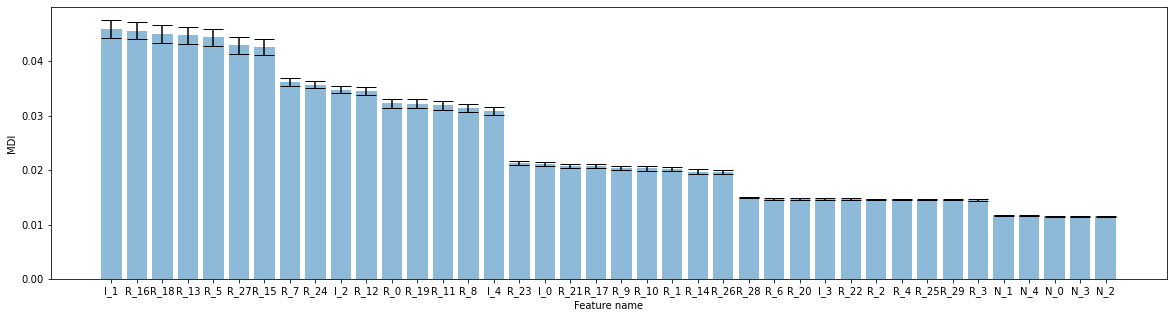

In [17]:
plt.figure(figsize=(20, 5))

plt.bar(imp.index, imp['mean'], align='center', alpha=0.5, ecolor='black', capsize=10)
# Add error bars
plt.errorbar(imp.index, imp['mean'], yerr=imp['std'], fmt='none', ecolor='black', capsize=10)
plt.xlabel('Feature name')
plt.ylabel('MDI')


In [18]:
imp_df = imp.reset_index()
imp_df.columns = ['Feature', 'MDI', 'std']

In [19]:
pvalues_series_df = pvalues_series.reset_index()
pvalues_series_df.columns = ['Feature', 'p-value' ]

In [20]:
mdi_pvalues = pd.merge(imp_df, pvalues_series_df, on = 'Feature')

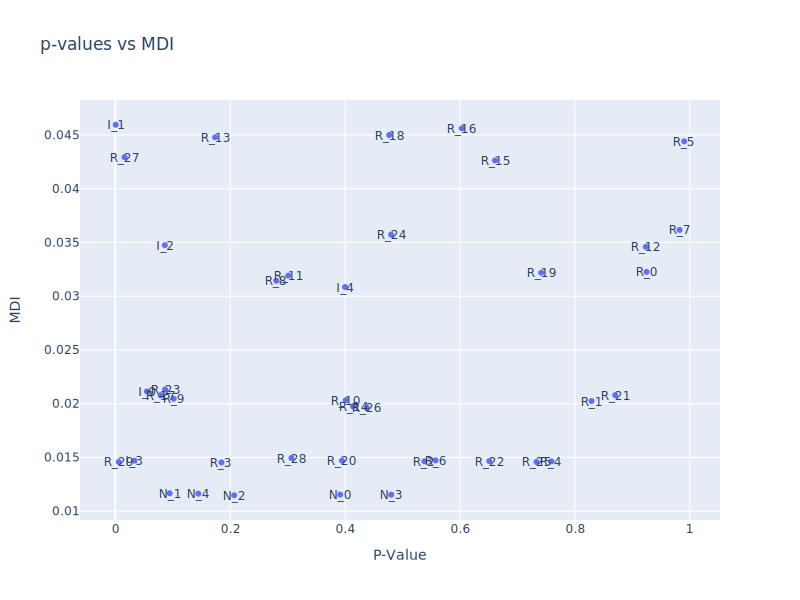

In [21]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'svg'  # or 'png', 'jpeg', etc.
# Create data
 

# Create scatter plot
scatter = go.Scatter(x=mdi_pvalues['p-value'], y=mdi_pvalues['MDI'], mode='markers')

# Add annotations
annotations = [go.layout.Annotation(x=pv, y=mdi, text=feat, showarrow=False) 
               for pv, mdi, feat in zip(mdi_pvalues['p-value'], mdi_pvalues['MDI'], mdi_pvalues['Feature'])]

# Create layout
 
# Create figure and add scatter plot
# fig = go.Figure(data=scatter, layout=layout)


# Create layout with figure size and axis labels
layout = go.Layout(
    annotations=annotations,
    title='p-values vs MDI',
    width=800,  # Specify width of the figure
    height=600,  # Specify height of the figure
    xaxis_title='P-Value',  # X-axis label
    yaxis_title='MDI'  # Y-axis label
)

# Create figure and add scatter plot
fig = go.Figure(data=scatter, layout=layout)


# Display the plot
fig.show()

In [22]:
# Example usage
# X, y = get_test_data(40, 5, 30, 10000, sigma_std=0.1)
clf = DecisionTreeClassifier(criterion='entropy', max_features=1, class_weight='balanced', min_weight_fraction_leaf=0)
clf = BaggingClassifier(base_estimator=clf, n_estimators=100, max_features=1.0, max_samples=1.0, oob_score=False)
imp_mda = feat_imp_mda(clf, X, y, 10)

Text(0, 0.5, 'MDA')

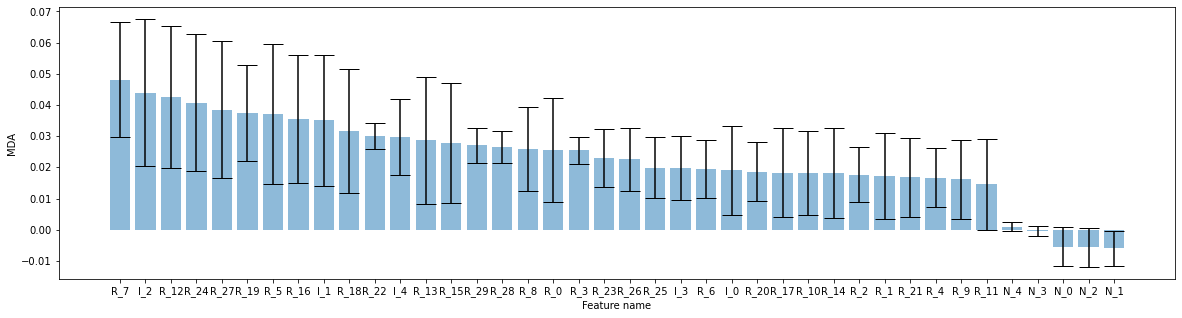

In [23]:
imp_mda.sort_values(by='mean', ascending = False, inplace=True)
plt.figure(figsize=(20, 5))

plt.bar(imp_mda.index, imp_mda['mean'], align='center', alpha=0.5, ecolor='black', capsize=10)
# Add error bars
plt.errorbar(imp_mda.index, imp_mda['mean'], yerr=imp_mda['std'], fmt='none', ecolor='black', capsize=10)
plt.xlabel('Feature name')
plt.ylabel('MDA')


In [24]:
imp_mda_df = imp_mda.copy(deep=True)

In [25]:
imp_mda_df = imp_mda_df.reset_index()
imp_mda_df.columns = ['Feature', 'MDA', 'MDA_std']

In [26]:
mdi_mda_pvalues = pd.merge(imp_df, imp_mda_df, on = 'Feature')

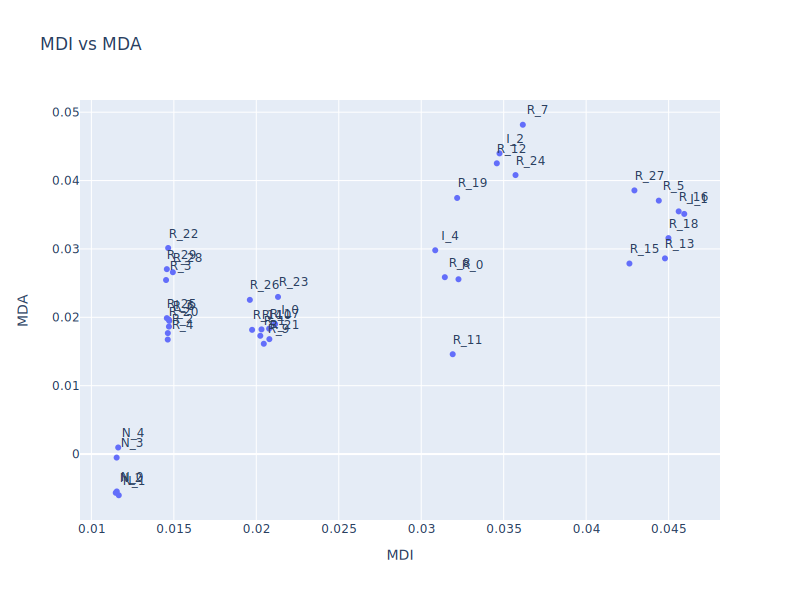

In [27]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'svg'  # or 'png', 'jpeg', etc.
# Create data
 

# Create scatter plot
scatter = go.Scatter(x=mdi_mda_pvalues['MDI'], y=mdi_mda_pvalues['MDA'], mode='markers')

# Add annotations
annotations = [go.layout.Annotation(x=pv, y=mdi, text=feat, showarrow=False, xshift=15,  # Shift annotation in the x-direction (adjust as needed)
        yshift=15 ) 
               for pv, mdi, feat in zip(mdi_mda_pvalues['MDI'], mdi_mda_pvalues['MDA'], mdi_mda_pvalues['Feature'])]

# Create layout
 
# Create figure and add scatter plot
fig = go.Figure(data=scatter, layout=layout)


# Create layout with figure size and axis labels
layout = go.Layout(
    annotations=annotations,
    title='MDI vs MDA',
    width=800,  # Specify width of the figure
    height=600,  # Specify height of the figure
    xaxis_title='MDI',  # X-axis label
    yaxis_title='MDA'  # Y-axis label
)

# Create figure and add scatter plot
fig = go.Figure(data=scatter, layout=layout)


# Display the plot
fig.show()

In [28]:
onc_model = ONC(  is_input_correlation=True,
                 max_number_clusters=10,
                 number_initializations=10,
                 n_jobs= 10 )

In [29]:
onc_model.fit(X.corr() )

In [30]:
corr0,clstrs,silh = onc_model.reordered_X, onc_model.clusters, onc_model.silhouette

In [31]:
corr0_old,clstrs_old,silh_old=clusterKMeansBase(X.corr(),maxNumClusters=10,n_init=10) 


maxNumClusters10


<AxesSubplot:>

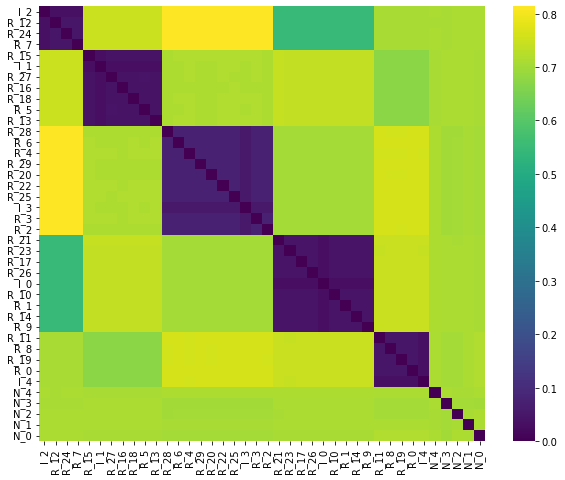

In [32]:
plt.figure(figsize=(10, 8))

sns.heatmap(corr0,cmap='viridis')

In [33]:
clstrs_old

{0: ['I_1', 'R_5', 'R_13', 'R_15', 'R_16', 'R_18', 'R_27'],
 1: ['I_0', 'R_1', 'R_9', 'R_10', 'R_14', 'R_17', 'R_21', 'R_23', 'R_26'],
 2: ['I_3',
  'R_2',
  'R_3',
  'R_4',
  'R_6',
  'R_20',
  'R_22',
  'R_25',
  'R_28',
  'R_29'],
 3: ['N_0', 'N_1', 'N_2', 'N_3', 'N_4'],
 4: ['I_4', 'R_0', 'R_8', 'R_11', 'R_19'],
 5: ['I_2', 'R_7', 'R_12', 'R_24']}

In [34]:
clstrs

{0: ['I_2', 'R_7', 'R_12', 'R_24'],
 1: ['I_1', 'R_5', 'R_13', 'R_15', 'R_16', 'R_18', 'R_27'],
 2: ['I_3',
  'R_2',
  'R_3',
  'R_4',
  'R_6',
  'R_20',
  'R_22',
  'R_25',
  'R_28',
  'R_29'],
 3: ['I_0', 'R_1', 'R_9', 'R_10', 'R_14', 'R_17', 'R_21', 'R_23', 'R_26'],
 4: ['I_4', 'R_0', 'R_8', 'R_11', 'R_19'],
 5: ['N_0', 'N_1', 'N_2', 'N_3', 'N_4']}

In [35]:
import pandas as pd

def group_mean_std(df, clusters):
    out = pd.DataFrame(columns=['mean', 'std'])
    for i, j in clusters.items():
        df1 = df[j].sum(axis=1)
        out.loc['C_' + str(i), 'mean'] = df1.mean()
        out.loc['C_' + str(i), 'std'] = df1.std() * df1.shape[0] ** -0.5
    return out

def feat_imp_mdi_clustered(fit, feat_names, clusters):
    df0 = {i: tree.feature_importances_ for i, tree in enumerate(fit.estimators_)}
    df0 = pd.DataFrame.from_dict(df0, orient='index')
    df0.columns = feat_names
    df0 = df0.replace(0, pd.NA)  # Replacing 0s with NA for better handling
    imp = group_mean_std(df0, clusters)
    imp /= imp['mean'].sum()
    return imp


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Create Decision Tree Classifier
dt_clf = DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    class_weight='balanced',
    min_weight_fraction_leaf=0
)

# Create Bagging Classifier with Decision Tree as base estimator
bagging_clf = BaggingClassifier(
    base_estimator=dt_clf,
    n_estimators=1000,
    max_features=1.0,
    max_samples=1.0,
    oob_score=False
)

# Fit the Bagging Classifier on the data
bagging_fit = bagging_clf.fit(X, y)

# Compute feature importance using featImpMDI_Clustered
imp_mdi_clustered = feat_imp_mdi_clustered(bagging_fit, X.columns, clstrs)


In [37]:
imp_mdi_clustered

,mean,std
C_0,0.140886,0.000859
C_1,0.311309,0.000983
C_2,0.146503,0.000368
C_3,0.184977,0.000603
C_4,0.158299,0.000873
C_5,0.058025,0.000229


Text(0, 0.5, 'Clustered MDI')

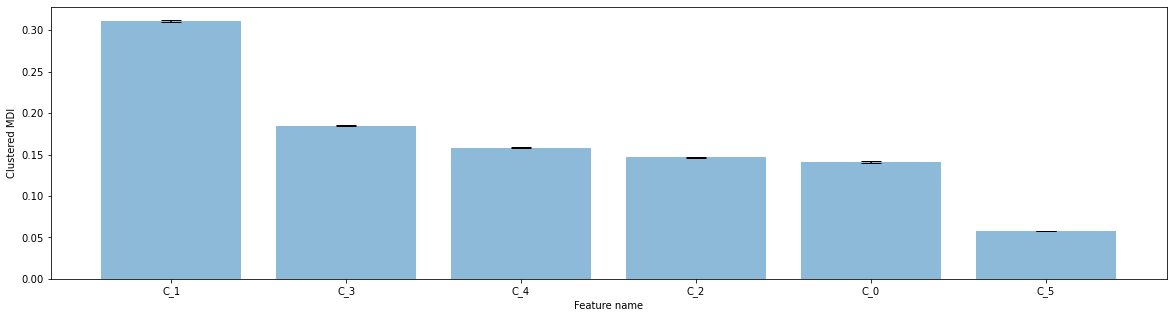

In [38]:
imp_mdi_clustered = imp_mdi_clustered.reset_index()
imp_mdi_clustered.columns = ['Feature', 'Clustered MDI', 'CMDIStd']
imp_mdi_clustered.sort_values(by='Clustered MDI', ascending = False, inplace=True)
plt.figure(figsize=(20, 5))

plt.bar(imp_mdi_clustered['Feature'], imp_mdi_clustered['Clustered MDI'], align='center', alpha=0.5, ecolor='black', capsize=10)
# Add error bars
plt.errorbar(imp_mdi_clustered['Feature'], imp_mdi_clustered['Clustered MDI'],
             yerr=imp_mdi_clustered['CMDIStd'], fmt='none', ecolor='black', capsize=10)
plt.xlabel('Feature name')
plt.ylabel('Clustered MDI')

In [39]:
import pandas as pd
import numpy as np
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold

In [40]:
def feat_imp_mda_clustered(clf, X, y, clusters, n_splits=10):
    cv_gen = KFold(n_splits=n_splits)
    scr0, scr1 = pd.Series(), pd.DataFrame(columns=clusters.keys())
    
    for i, (train, test) in enumerate(cv_gen.split(X=X)):
        X0, y0 = X.iloc[train, :], y.iloc[train]
        X1, y1 = X.iloc[test, :], y.iloc[test]
        fit = clf.fit(X=X0, y=y0)
        prob = fit.predict_proba(X1)
        scr0.loc[i] = -log_loss(y1, prob, labels=clf.classes_)
        
        for cluster_name, cluster_indices in clusters.items():
            X1_ = X1.copy(deep=True)
            for k in cluster_indices:
                np.random.shuffle(X1_[k].values)
            prob = fit.predict_proba(X1_)
            scr1.loc[i, cluster_name] = -log_loss(y1, prob, labels=clf.classes_)
    
    imp = (-1 * scr1).add(scr0, axis=0)
    imp = imp / (-1 * scr1)
    imp_stats = pd.concat({'mean': imp.mean(), 'std': imp.std() * imp.shape[0] ** -0.5}, axis=1)
    imp_stats.index = ['C_' + str(i) for i in imp_stats.index]
    
    return imp_stats

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# Create Decision Tree Classifier
dt_clf = DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    class_weight='balanced',
    min_weight_fraction_leaf=0
)

# Create Bagging Classifier with Decision Tree as base estimator
bagging_clf = BaggingClassifier(
    base_estimator=dt_clf,
    n_estimators=1000,
    max_features=1.0,
    max_samples=1.0,
    oob_score=False
)

# Fit the Bagging Classifier on the data
bagging_fit = bagging_clf.fit(X, y)

# Compute feature importance using featImpMDI_Clustered
imp = feat_imp_mda_clustered(bagging_fit, X ,y , clstrs)


In [42]:
df = pd.DataFrame.from_dict(clstrs, orient='index')
df = df.T

In [43]:
df.columns.tolist()

[0, 1, 2, 3, 4, 5]

In [44]:
[f'C_{i}' for i in range(5)]

['C_0', 'C_1', 'C_2', 'C_3', 'C_4']

In [45]:

df.columns = [f'C_{i}' for i in range(6)]

In [46]:
df.fillna('-')

,C_0,C_1,C_2,C_3,C_4,C_5
0,I_2,I_1,I_3,I_0,I_4,N_0
1,R_7,R_5,R_2,R_1,R_0,N_1
2,R_12,R_13,R_3,R_9,R_8,N_2
3,R_24,R_15,R_4,R_10,R_11,N_3
4,-,R_16,R_6,R_14,R_19,N_4
5,-,R_18,R_20,R_17,-,-
6,-,R_27,R_22,R_21,-,-
7,-,-,R_25,R_23,-,-
8,-,-,R_28,R_26,-,-
9,-,-,R_29,-,-,-


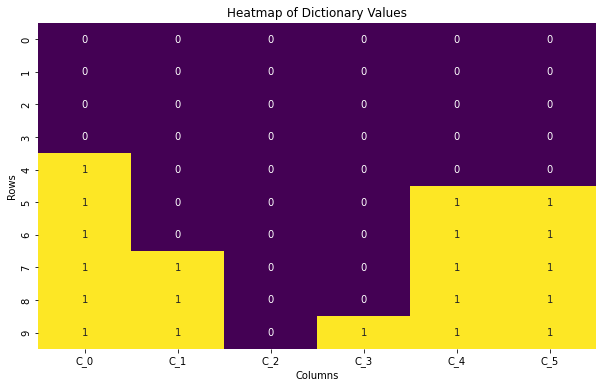

In [47]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, annot=True)

plt.title('Heatmap of Dictionary Values')
plt.xlabel('Columns')
plt.ylabel('Rows')

plt.show()

In [48]:

import pprint


pp = pprint.PrettyPrinter(indent=4)
pp.pprint(clstrs)


{   0: ['I_2', 'R_7', 'R_12', 'R_24'],
    1: ['I_1', 'R_5', 'R_13', 'R_15', 'R_16', 'R_18', 'R_27'],
    2: [   'I_3',
           'R_2',
           'R_3',
           'R_4',
           'R_6',
           'R_20',
           'R_22',
           'R_25',
           'R_28',
           'R_29'],
    3: ['I_0', 'R_1', 'R_9', 'R_10', 'R_14', 'R_17', 'R_21', 'R_23', 'R_26'],
    4: ['I_4', 'R_0', 'R_8', 'R_11', 'R_19'],
    5: ['N_0', 'N_1', 'N_2', 'N_3', 'N_4']}


In [49]:
pd.DataFrame.from_dict(clstrs)

ValueError: All arrays must be of the same length

In [ ]:
imp_clustered_mda = imp.reset_index()
imp_clustered_mda.columns = ['Feature', 'Clustered MDA', 'CMDAStd']
imp_clustered_mda.sort_values(by='Clustered MDA', ascending = False, inplace=True)
plt.figure(figsize=(20, 5))

plt.bar(imp_clustered_mda['Feature'], imp_clustered_mda['Clustered MDA'], align='center', alpha=0.5, ecolor='black', capsize=10)
# Add error bars
plt.errorbar(imp_clustered_mda['Feature'], imp_clustered_mda['Clustered MDA'], yerr=imp_clustered_mda['CMDAStd'], fmt='none', ecolor='black', capsize=10)
plt.xlabel('Feature name')
plt.ylabel('Clustered MDA')


In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(imp.index, imp['mean'])

In [ ]:
pvalues_series = ols.pvalues.sort_values()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
categories = ['A', 'B', 'C', 'D', 'E']
values = [20, 35, 30, 35, 27]
errors = [2, 3, 4, 1, 2]

# Create bar plot
plt.bar(categories, values, align='center', alpha=0.5, ecolor='black', capsize=10)

# Add error bars
plt.errorbar(categories, values, yerr=errors, fmt='none', ecolor='black', capsize=10)

# Add labels
for i in range(len(categories)):
    plt.text(x = i, y = values[i]+errors[i], s = categories[i], size = 10, ha='center')

# Display the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create data
categories = ['A', 'B', 'C', 'D', 'E']
values = [20, 35, 30, 35, 27]
errors = [2, 3, 4, 1, 2]

# Create bar plot
bars = plt.bar(categories, values, align='center', alpha=0.5, ecolor='black', capsize=10)

# Add error bars
plt.errorbar(categories, values, yerr=errors, fmt='none', ecolor='black', capsize=10)

# Add labels inside the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 5, round(yval, 2), ha='center', va='top', color='white')

# Display the plot
plt.show()

In [ ]:
STOP

- Clustered MDI
    - the sum of the MDI values of the features that constitute that cluster. 
    - If there is one feature per cluster, then MDI and clustered MDI are the same.
    - In the case of an ensemble of trees, there is one clustered MDI for each tree, which allows us to compute the mean clustered MDI, and standard deviation around the mean clustered MDI, similarly to how we did for the feature MDI.

- Clustered MDA
    - The MDA of a feature is computed by comparing the performance of an algorithm before and after shuffling that feature.
    - When computing clustered MDA, instead of shuffling one feature at a time, we shuffle all of the features that constitute a given cluster.
    - If there is one cluster per feature, then MDA and clustered MDA are the same 

The mean-decrease accuracy (MDA) method works as follows: 
- first, it fits a model and computes its cross-validated performance; 
- second, it computes the cross-validated performance of the same fitted model, with the only difference that it shuffles the observations associated with one of the features. 
- That gives us one modified cross-validated performance per feature. 
- Third, it derives the MDA associated with a particular feature by comparing the cross-validated performance before and after shuffling. 
    - Shuffling a feature could potentially improve the cross-validated performance, when the feature is uninformative to the point of being detrimental.
    - If the feature is important, there should be a significant decay in performance caused by the shuffling, as long as the features are independent. 
    - When features are not independent, MDA may underestimate the importance of interrelated features. 
    - At the extreme, given two highly important but identical features, MDA may conclude that both features are relatively unimportant, because the effect of shuffling one may be partially compensated by not shuffling the other.
- An important attribute of MDA is that, like ensemble MDIs, it is not the result of a single estimate, but rather the average of multiple estimates (one for each testing set in a k-fold cross-validation).
- Because MDA involves a cross-validation step, this method can be computationally expensive.

- A classifier may achieve high accuracy even though it made:
    - good predictions with low confidence and 
    - bad predictions with high confidence.  
- Negative average likelihood:
$$ \text{NAL} = -\frac{1}{N}\sum_{n=0}^{N-1}\sum_{k=0}^{K-1}y_{n,k}p_{n,k}$$
where
    - $p_{n,k}$ is the probability associated with prediction $n$ of label $k$
    - $y_{n,k} \in \{0,1\}$ where $y_{n,k}=1$ when observation $n$ was assigned label $k$ and $y_{n,k}=0$ otherwise
- Probability-weighted accuracy 
$$\text{PWA} = \frac{\sum_{n=0}^{N-1} y_n(p_n-\frac{1}{K} )}{\sum_{n=0}^{N-1} (p_n-\frac{1}{K})} $$
where 
    - $p_n = \max_k{p_{n,k}}$ 
    - $y_n$ is an indicator function, $y_{n} \in \{0,1\}$ where $y_{n}=1$ when the prediction was corret, and $y_n=0$ otherwise \
  This is equivalent to standard accuracy when the classifier has absolute conviction in every prediction ($p_n=1 \quad \forall n$)\
  PWA punishes bad predictions made with high confidence more severely than accuracy, but less severely than log-loss

- First, project the observed features into a metric space 
$$ X \in \mathbb{R}^{N\times F} \rightarrow \tilde{X} \in \mathbb{R}^{N\times N}$$
    - correlation based approach 
    - use information-theoretic concepts
        - such as variation of information
        - advantage of capturing redundant features that are the result of nonlinear combinations of informative features
- Second, we apply a procedure to determine the optimal number and composition of clusters, 
    - such as the ONC algorithm.
    - Features that belong to the same cluster share a large amount of information, and features that belong to different clusters share only a relatively small amount of information.
- Some silhouette scores may be low due one feature being a combination of multiple features across clusters. This is a problem, because ONC cannot assign one feature to multiple clusters.
    - For each cluster $k=1,\cdots,K$, replace the features included in that cluster with residual features, where those residual features do not contain information from features outside cluster $k$
    - To be precise:
        - let $D_k$ be the subset of of index features $D={1, \cdots, F}$ included cluster $k$, where
            - $D_k \subset D$
            - $\mid D_k\mid >0, \forall k$
            - $D_k \cap D_l =\emptyset,  \forall k\neq l$
            - $D=\cup_{k=1}^KD_k$\
         Then , $\forall X_i$ where $i \in D_k$, we compute the residual $\hat{\epsilon}_i$ by fitting 
         $$ X_{n,i} = \alpha_i + \sum_{j \in \cup_{l\neq k}D_k} \beta_{i,j}X_{n,j} + \epsilon_{n,i}$$
         where $n=1,\cdots, N$ is the index of observations per feature.
     - By replacing each feature $X_i$ with its residual equivalent $\hat{\epsilon}_i$, we remove from cluster $k$ information that is already included in other clusters, while preserving the information that exclusively belongs to cluster $k$.
- This transformation is not necessary if the silhouette scores clearly indicate that features belong to their respective clusters.

- Entropy :
$$-\sum_{j=1}^Cp_j\log{p_j}$$
    - also called information gain 
- Gini index: 
$$ \sum_{j=1}^Cp_j (1-p_j) = 1- \sum_{j=1}^Cp_j^2 $$
- Misclassification rate: 
$$ 1-\max_jp_j$$
- Mean squared errors
$$\frac{1}{\lvert T \rvert} \sum_{i \in T}(y_i-\overline{y})^2$$

$$\Delta \iota(s_t,t) = \iota(s_t,t) - p_R \iota(s_t,t_R) - p_L \iota(s_t,t_L) $$
$$\Delta \iota(s_t,t) = \iota(s_t,t) - p_R \iota(s_t,t_R) - p_L \iota(s_t,t_L) $$

$$\Delta \iota(s_t,t) = -\sum_{j=1}^Cp_j\log{p_j} + p_R \sum_{j=1}^Cp_{j}^R\log{p_j^R} + p_L\sum_{j=1}^Cp_j^L\log{p_j^L} $$

$$\Delta \iota(s_t,t) = -\sum_{j=1}^Cp(C=j\mid t)\log{p(c=j\mid t)} + p(t_R\mid t) \sum_{j=1}^Cp(c=j\mid t_R) \log{p(c=j\mid t_R)} + p(t_L\mid t)\sum_{j=1}^Cp(c=j\mid t_L)\log{p(c=j\mid t_L)} $$


$\Delta \iota(s_t,t)$ is the mutual information between split outcome at $t$ and the target variable.
- Let $S$ a discrete random variable with two values:
    - $L$: $p(S=L) = p(t_L\mid t)$
    - $R:$ $p(S=R) = p(t_R\mid t)$



 \begin{align*}
\Delta \iota(s_t,t) &= \iota(s_t,t) - p_R \iota(s_t,t_R) - p_L \iota(s_t,t_L) \\
    &=-\sum_{j=1}^Cp_j\log{p_j} + p_R \sum_{j=1}^Cp_{j}^R\log{p_j^R} + p_L\sum_{j=1}^Cp_j^L\log{p_j^L} \\
    &=-\sum_{j=1}^Cp(c=j)\log{p(c=j)} + \\
    & p(S=R) \sum_{j=1}^Cp(c=j\mid S=R)\log{p(c=j\mid S=R)} + \\
    & p(S=R) \sum_{j=1}^Cp(c=j\mid S=R)\log{p(c=j\mid S=R)} +  \\ 
    &=-\sum_{j=1}^C\sum_{s\in{R,L}}p(c=j, S=s)\log{p(c=j)} + \\
    &  \sum_{j=1}^Cp(c=j, S=R)\log{p(c=j\mid S=R)} + \\
    &  \sum_{j=1}^Cp(c=j, S=L)\log{p(c=j\mid S=L)} +  \\ 
        &=-\sum_{j=1}^C\sum_{s\in{R,L}}p(c=j, S=s)\log{p(c=j)} + \\
    &  \sum_{j=1}^C\sum_{s\in{R,L}} p(c=j, S=s)\log{p(c=j\mid S=s)}  \\
    & = \sum_{j=1}^C\sum_{s\in{R,L}} p(c=j, S=s)\log{ \frac{\log{p(c=j\mid S=s)}}{p(c=j)} }\\
    & = \sum_{j=1}^C\sum_{s\in{R,L}} p(c=j, S=s)\log{ \frac{\log{p(c=j, S=s)}}{p(S=s)p(c=j)} }\\
    & = \text{MI}(S,C)
\end{align*}

Let 
- $R$: number of trees
- $\mathcal{B}$: the ensemble of trees 
- $\mathcal{T}$: a tree $\in \mathcal{B} $
- $t$:  a node $\in \mathcal{T}$
- $s_t$: the split at node $t$
- $v(s_t)$: the feature selected at split $s_t$
- $x_d$: arbitrary feature
- $\lvert \mathcal{D}(t) \rvert$: number of points at node $t$
- $\lvert \mathcal{D} \rvert$: number of points in the sample
- $\Delta \iota(s_t,t)$: impurity decrease at the node $t$

$$
\text{MDI}_{\mathcal{T}}(x_d) =    \sum_{t\in \mathcal{T}: v(s_t)=x_d} \frac{\lvert \mathcal{D}(t) \rvert}{\lvert \mathcal{D} \rvert}\Delta \iota(s_t,t)  
$$

$$
\mathbb{E}\big[\text{MDI}(x_d) \big] \approx  \frac{1}{R}\sum_{\mathcal{T} \in \mathcal{B}}    \text{MDI}_{\mathcal{T}}(x_d)  
$$
$$
\mathbb{Var}\big[\text{MDI}(x_d) \big] \approx  \frac{1}{R-1}\sum_{\mathcal{T} \in \mathcal{B}}  \Big[  \text{MDI}_{\mathcal{T}}(x_d)  - \mathbb{E}\big[\text{MDI}(x_d) \big] \Big]^2
$$

$$
 \widetilde{\text{MDI}}(x_d) =  \frac{\mathbb{E}\Big[\text{MDI}(x_d) \Big] }{\sum_{d=1}^D   \mathbb{E}\Big[\text{MDI}(x_d) \Big] }
$$



By central limit theorem, as $R \rightarrow \infty$, 
$$ \sqrt{R}\Big( \text{MDI}(x_d) -  \mathbb{E}\big[\text{MDI}(x_d) \big]\Big) \sim \mathcal{N}\Big(0, \mathbb{Var}\big[\text{MDI}(x_d) \big] \Big)$$

- The masking effect denotes situations where several candidate splits on different
variables yield roughly the same impurity reduction, but one is always slightly better
so that none of the other ones has a chance to be selected by the tree-growing algorithm. 
    - Concretely, some branches are never explored as splits are never selected.
- This induces a positive bias for importances of masking features as they are more
frequently selected and their contributions is prioritised over features carrying similar information about the target:
    - i.e., in case of two redundant features with one masking the other, the first one always receives credit for its information because
the second one is never selected before. 
- In contrast, importance of masked features
are negatively biased and under-estimated.

- The masking effect occurs when multiple possible splits across various variables result in similar reductions in impurity, yet one split consistently outperforms the others, preventing the algorithm from choosing alternative splits. 
    - As a result, certain branches remain unexplored, leading to a bias favoring the importance of masking features. 
- These features are frequently selected, prioritizing their contributions over similarly informative features. 
    - For instance, if one redundant feature masks another, the former always receives recognition for its information, as the latter is never chosen first. 
- Conversely, the importance of masked features is underestimated due to this bias.

- A solution to reduce the bias stemming from masking effect is to reduce the value of the randomization parameter $K$.
- This bias can be completely eliminated by using totally randomised trees ($K$ = 1)
- However:
    - this usually requires  larger number of trees and,
    - might jeopardise the predictive performance of the model in presence of many irrelevant features.

- Masking effects take place when some features are systematically ignored by tree-based classifiers in favor of others. In order to avoid them, set `max_features=int(1)` when using sklearn’s RF class. In this way, only one random feature is considered per level.
    - Every feature is given a chance (at some random levels of some random trees) to reduce impurity.
    - Make sure that features with zero importance are not averaged, since the only reason for a 0 is that the feature was not randomly chosen. Replace those values with `np.nan`.
- The procedure is obviously in-sample. Every feature will have some importance, even if they have no predictive power whatsoever.
- MDI cannot be generalized to other non-tree based classifiers.
- By construction, MDI has the nice property that feature importances add up to 1, and every feature importance is bounded between 0 and 1.
- The method does not address substitution effects in the presence of codependent features. MDI dilutes the importance of substitute features, because of their interchangeability: 
    - The importance of two identical features will be halved (shared), as they are randomly chosen with equal probability.
- MDI is biased towards some predictor variables especially those with large number of splits/cutoffs or larger number of categories.

In Hypothesis testing, the objective is to formally examine two opposing and mutually exclusive conjectures 
- $H_0$: null hypothesis 
    - states the assumption to be tested
- $H_1$: the alternative hypothesis
    - the opposite of the null hypothesis
    - challenges the status quo 
    - is generally the hypothesis that is believed to be true by the researcher 

- Test statistic $X$
    - A quantity derived from the sample 
    - Typically measures the strength of the evidence against the null hypothesis
    - Important property: its sampling distribution under the null hypothesis must be calculable 
        - exactly, or
        - approximately 
    - let $f_0$ be the density of $X$ when $H_0$ is true
- The p-value:
    - The probability of getting the observed value $x$ of the test statistic $X$, or a value with even greater evidence against $H_0$ if the null hypothesis is true
        $$ P(\lvert X \rvert
  \geq \lvert x \rvert
 \mid H_0)$$
     - If we know the distribution of the test statistic, we then can compute this probability (p-value)
     - The smaller the p-value, the greater the evidence against the null hypothesis

$$ f_0(x\mid H_0)$$


$$ f_1(x\mid H_1)$$

- Error:
    - Type I (false positive): reject $H_0$ when it is true ($\alpha$)
    - Type II (false negative): fail to reject $H_0$ when $H_1$ is true ($\beta$)
- Power of the test:
    - probability of True positive
    - probability of correcting hte null hypothesis
$$1-\beta$$

$$ P(\lvert T \rvert
  \geq \lvert t \rvert
 \mid H_0)$$
 
$$ P(  H_0 \mid \text{Data}) \approx P(H_0 \mid  \lvert T  \rvert
  \geq \lvert t \rvert
 ) $$
  

In Hypothesis testing, the objective is to formally examine two opposing and mutually exclusive conjectures 
- $H_0$:  
    $$\beta = 0$$
- $H_1$:  
$$\beta \neq 0$$
- Test statistic  
  $$T = \frac{\hat{\beta}}{s^2} \rightarrow \text{t-distribution}$$ 


- If:
    - $Z\sim \mathcal{N}(0,1)$ and 
    - $X \sim \chi_{\nu}^2$  , 
- then:
    - $T= \frac{Z}{\sqrt{\frac{X}{\nu}}}$ has a  Student's  $t$ distribution with $\nu$ degrees of freedom,

|  |  Heteroskedasticity | Correlated disturbances | Multi-collinearity | Omitted Variables 
|-----------------|-----------------|-----------------|-----------------|-----------------|
| Biasedness     | No impact       | No impact       | No-impact       | Biased estimates|
| Consistency | No impact | No impact | No-impact |Inconsistent estimates |
| Efficiency | $\mathbb{Var}(\hat{\beta})$ is underestimated  | $\mathbb{Var}(\hat{\beta})$ is underestimated |$\mathbb{Var}(\hat{\beta})$ is overestimated |$\mathbb{Var}(\hat{\beta})$ is underestimated |
|   | t-stats are artificially high | t-stats are artificially high |t-stats are artificially low |t-stats are artificially high |
| Coefficient of determination ($R^2$) |  No-impact |  No-impact  | No-impact  |typically lower |



- $\alpha = \mathbb{P}(\text{reject} H_0 \mid H_0 \text{is true} )$
- Qustion: If we perform $m$ independent hypothesis tests, what is the probability of at least one false positive (Type I error, i.e. the incorrect rejection of the a true null hypothesis) ?
- Answer: 
 \begin{align*}
     \mathbb{P}[\text{Making a Type I error}] &= \alpha \\
     \mathbb{P}[\text{Not Making a Type I error}] &= 1-\alpha \\
     \mathbb{P}[\text{Not Making a Type I error in m tests}] &= (1-\alpha)^m \\
     \mathbb{P}[\text{Making at least one Type I error in m tests}] &= 1-(1-\alpha)^m \\
\end{align*}
 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the significance level (alpha)
alpha = 0.05

# Define the number of independent tests (m)
m_values = np.arange(1, 100)  # Values from 1 to 100 tests

# Calculate the probability of making at least one Type I error in m tests
prob_error = 1 - (1 - alpha) ** m_values

# Plot the chart
plt.figure(figsize=(10, 6))
plt.plot(m_values, prob_error)#, label=r'$\mathbb{P}[\text{Making at least one Type I error}]$')
plt.axhline(y=alpha, color='r', linestyle='--', label=r'$\alpha$')
plt.xlabel('Number of Independent Tests (m)')
plt.ylabel('Probability')
plt.title('Probability of Making at least one Type I Error vs. Number of Tests')
plt.legend()
plt.grid(True)
plt.show()


- The Gauss-Markov 
    - Assumptions
        1. Linear relationship between $y$ and $\pmb{X}$
        2. The matrix $\pmb{X}$ is of full rank (no perfect multicollinearity)
        3. $\mathbb{E}[\epsilon \mid \pmb{X}] = 0$, which implies $\mathbb{E}[ y \mid  \pmb{X}] = \pmb{X} \pmb{\beta}$
        4. $\mathbb{Var}[\epsilon \mid \pmb{X}] = \mathbb{E}[\epsilon \epsilon^T\mid \pmb{X}] = \sigma^2 \mathbb{I}$ (not to be confused with $\mathbb{Var}[\epsilon] $)
            - Homoskedasticity 
            - Uncorrelated disturbances
        5. $\pmb{X}$ may be fixed or random, but must be generated by a mechanism that is unrelated to $\epsilon$
        6. $\epsilon\mid \pmb{X} \sim \mathcal{N}(0,  \sigma^2 \mathbb{I})$
    - **Theorem**
        - conditional on assumptions 1-5, there will be no other linear and unbiased estimator of the coefficients that has a smaller sampling variance. 
        - In other words, the ordinary least square (OLS) estimator is the Best Linear, Unbiased and efficient estimator (BLUE).
 



$$
y =  \pmb{X}\beta + \epsilon
$$

$$
\hat{\beta} = (\pmb{X}^T\pmb{X})^{-1}\pmb{X}^Ty
$$

- $
\mathbb{E}[\hat{\beta}]  = \beta
$
- $\mathbb{Var}[\hat{\beta} \mid \pmb{X}] = \sigma^2 (\pmb{X}^T\pmb{X})^{-1}$
- $e=y-\hat{y}$
- $s^2=\frac{e^Te}{N-D}$ is an unbiased estimator of $\sigma^2$

- A clustering problem consists of a set of objects and a set of features associated with those objects. 
- The goal is to separate the objects into groups (called clusters) using the features, where intragroup similarities are maximized, and intergroup similarities are minimized. 
- It is a form of unsupervised learning, because we do not provide examples to assist the algorithm in solving this task. 
- Clustering problems appear naturally in finance, at every step of the investment process. 
    - For instance, analysts may look for historical analogues to current events, a task that involves developing a numerical taxonomy of events. 
    - Portfolio managers often cluster securities with respect to a variety of features, to derive relative values among peers. 
    - Risk managers are keen to avoid the concentration of risks in securities that share common traits. 
    - Traders wish to understand flows affecting a set of securities, to determine whether a rally or sell-off is idiosyncratic to a particular security, or affects a category shared by a multiplicity of securities. 
    
    

- Consider a binary random classification problem composed of forty features, where:
    - five are informative, 
    - thirty are redundant, and 
    - five are noise. 
- Informative features (marked with the “I_” prefix) are those used to generate labels. 
- Redundant features (marked with the “R_” prefix) are those that are formed by adding Gaussian noise to a randomly chosen informative feature (the lower the value of sigmaStd, the greater the substitution effect). 
- Noise features (marked with the “N_” prefix) are those that are not used to generate labels.

For a given element $i$ and a given clustering, the silhouette $S_i$ is defined as:
$$
S_i = \frac{b_i-a_i}{\max(\{a_i,b_i\}) } , i=1, \cdots, N
$$
where:
- $a_i$ is the average distance between $i$ and all other elements in the same cluster
- $b_i$ is the average distance between $i$ and all the elements in the nearest cluster of which $i$ is not a member. 
- Effectively, this is a measure comparing intracluster distance and intercluster distance.
- A value. $S_i=1$ means that element $i$ is clustered well
- A value $S_i=-1$ means that $i$ was clustered poorly 

For a given partition , the clustering quality $q$ is defined as 

$$ q = \frac{\mathbb{E}(S_i)}{ \sqrt{\mathbb{Var}(S_i)} } $$

where:
- $\mathbb{E}(S_i)$ is the mean of the silhouette coefficients 
- $\mathbb{Var}(S_i)$ is the variance of the silhouette coefficients 

The following modification addresses the k-mean’s initialization problem. \
At the base level, our clustering algorithm performs the following operation: 
- first, evaluate the observation matrix; 
- second, we perform a double for ... loop. 
    - In the first loop, we try different $k=2, \cdots, N$ on which to cluster via $k$-means for one given initialization, and evaluate the quality $q$ for each clustering. 
    - The second loop repeats the first loop multiple times, there by attempting different initializations.
- Third, over these two loops, we select the clustering with the highest $q$.

- The third modification to k-means deals with clusters of inconsistent quality. 
- The base clustering may capture the more distinct clusters, while missing the less apparent (obvious) ones.
- To address this issue, we evaluate the quality $q_k$ of each cluster $k=1, \cdots,K$ given the clustering quality scores obtained from the base clustering algorithm.
- We the take the average quality
$$\overline{q} = \frac{1}{N}\sum_{i=1}^Nq_i $$
- Find the set of clusters with quality below average
$$\{ q_k \mid q_k < \overline{q} , k=1, \cdots, K \}$$
- Let us denote $K_1$ the number of clusters in the previous set, $K_1<K$.
- If the number of clusters to rerun is $K_1 \leq 1$, then we return the clustering given by the base algorithm.
- However, if $K_1 \geq 2$, we rerun the clustering of the items in those $K_1$ clusters, while the rest are considered acceptably clustered. 
- We form a new (reduced) observations matrix out of the elements that compose the $K_1$ clusters, and rerun the base clustering algorithm on that reduced correlation matrix. 
- Doing so will return a, possibly new, clustering for those elements in $K_1$. 
- To check its efficacy, we compare the average cluster quality before and after reclustering those elements in $K_1$. 
- If the average cluster quality improves, we return the accepted clustering from the base clustering concatenated with the new clustering for the redone nodes. 
- Otherwise, we return the clustering formed by the base algorithm.

The Elbow method leverages the within-cluster sum of squares (WCSS). \
The process is pretty straightforward:

- Run k-means clustering   for a range of cluster sizes ($K$ values).
- Compute the total WCSS for each $k = 1, \cdots, K$.
- Create a plot with the number of clusters on the x-axis and the corresponding total WCSS on the y-axis.
- Locate the “elbow” point, where adding another cluster doesn’t offer much better fitting to the data.
- When you increase the number of clusters, the WSS naturally decreases. But after a specific point, you achieve diminishing returns on improving the compactness of the clusters.

Pros:
- Simplicity and Intuitiveness: Easy to understand and implement.
- Good for Quick Decisions: Offers a fast solution without excessive computation. 

Cons:
- Subjectivity: The "elbow" isn’t always clear-cut, leading to different interpretations.
- Oversimplification: May not work as efficiently with complex, high-dimensional data.

- Given the tuple $(N, M, K)$, we wish to create a random block correlation matrix of size $N\times N$, made up of $K$ blocks, each of size greater or equal than $M$. Let us describe the procedure for randomly partitioning $N$ items into $K$ disjoint groups, each of size at least $M$.

- Note that this is equivalent to randomly partitioning $N^{\prime} = N - K(M-1) $ items into $K$ groups each of size at least 1:
    - The adjustment formula $N^{\prime} = N - K(M-1) $ ensures that each box has at least $M$ items at the start, accounting for the $K$ blocks of size $M$ each. 
    - After distributing $M-1$ items to each box, we are left with $N^{\prime}$  items to distribute freely among the $K$ boxes.
    - Randomly partition the $N^{\prime}$ items among the $K$ boxes ensures that each box has at least 1 item (since  $N^{\prime}$  and $K$ are both positive)


- Consider randomly choosing $K - 1$ distinct items, denoted as set $B$, from the set 
$A=(1, \cdots, N^{\prime}-1)$, then add the $(N^{\prime})^{th}$ point to $B$ so that $B$ is of size $K$. 
- Thus, $B$ contains $i_1, \cdots, i_K$, where $1 \leq i_1 < i_2 < \cdots < i_K = N^{\prime}$.
- Given $B$, consider the $K$ partition sets:
    - $C_1=0, \dots, i_{1}-1$
    - $C_2=i_1, \dots, i_{2}-1$
    - $\cdots $
    - $C_K=i_{K-1}, \dots, i_{K}-1$
- Given that $i_j$ are distinct:
    - each partition contains at least one element as desired, 
    - and furthermore completely partitions the set  $(0, \dots, N^{\prime}-1)$
- In doing so, each set $C_j$ contains $i_j - i_{j-1}$ elements for $j=1, \cdots,K$, letting $i_0=0$
- We can generalize again by adding $M-1$ elements to each block.


## Procedure for Creating Random Block Correlation Matrix

Given the tuple $(N, M, K)$, where:
- $N$: Total number of items.
- $M$: Minimum size of each block.
- $K$: Number of blocks.
1. **Adjustment for Minimum Block Size:**
   - Calculate $N' = N - K(M-1)$.
   - This adjustment ensures each block starts with at least $M$ items.
2. **Random Partitioning:**
   - Randomly distribute $N'$ items into $K$ groups, ensuring each group has at least 1 item.
   - This guarantees randomness while meeting the minimum block size requirement.
3. **Specific Procedure:**
   - Randomly choose $K - 1$ distinct items from the set $A = (1, \cdots , N'-1)$.
   - Add the $N'$th item to create set $B$ of size $K$.
   - Set $B$ contains $i_1, \cdots, i_K$, where $1 \leq i_1 < i_2 < \cdots < i_K = N'$.
4. **Partition Sets:**
   - Create $K$ partition sets $C_1, C_2, \cdots, C_K$.
   - Each $C_j$ contains elements from 0 to $N'-1$, with $C_j = i_{j-1}, \cdots, i_{j} - 1$, where $i_0 = 0$.
5. **Generalization for Block Size:**
   - For each block $C_j$, determine the number of extra elements needed to reach size $M$:
     - $\text{extra}_j = \max(0, M - (i_j - i_{j-1}))$
   - Randomly select $\text{extra}_j$ elements from set $A$ and add them to block $C_j$.
   - Repeat this process for all blocks to ensure each has at least M elements.
6. **Generation of covariance matrix $\Sigma$**
   - Let each blokc $k=1, \cdots, K$ have size $x_k \times x_k$, where $x_k \geq M$, thus implying:
       - $x_1+\cdots + x_K = N \geq MK$
   - First, for each block $k$, we create a time series $S$ of length $T$ that is made from iid standard Gaussians, then make copies of that to each column of a matrix $X$ of size $(T, x_k)$.
   - Second, we add to each $X_{ij}$ a random Gaussian with standard deviation $\sigma >0$. By design, the columns of $X$ will be highly correlated for small $\sigma$, and less correlated for large $\sigma$.
   - Third, we evaluate the covariance matrix $\Sigma_X$ for the columns of $X$ , and add $\Sigma_X$ as a block to $\Sigma$
   - Fourth, we add to $\Sigma$ another covariance matrix with one block but larger $\sigma$.
   - Finally, we derive the correlation matrix $\rho$ related to $\Sigma$. By design, $\rho$ will have $K$ blocks with high correlations in side each block, and low correlations otherwise.

We design a Monte Carlo experiment to verify the accuracy of the ONC algorithm introduced earlier:
- first, we create an $N\times N$ correlation matrix $\rho$ from random draws with a predefined number of blocks $K$, where intrablock correlation is high and across-block correlation is low; 
- second, we shuffle that correlation matrix. 
- Third, we apply ONC, and verify that the ONC algorithm recovers the blocks we injected

Let:
- $N$: the number of data points (securities in our case)
- $D$: the number of features characterizing each security
- $X \in \mathbb{R}^{X\times D}$ be the data matrix 
- $X$ follow a multi-variate normal distribution with correlation matrix $\rho$
- $\rho_{ij}$: the correlation between variables $i$ and $j$
- If a strong common component is present, it is advisable to remove it by applying detoning
    - a factor exposure shared by all variables may hide the existence of partly shared exposures
- Since some clustering  algorithms expect as input a measure of similarity (or dissimilarity), we can either use:
    - $\tilde{X}_{ij} = \rho_{ij}$
    - $\tilde{X}_{ij} = \sqrt{\frac{1}{2}(1-\rho_{ij})}$
    

## Generation of Random Block Correlation Matrics 

In [ ]:
number_factors = 100
number_blocks = 6
minimum_block_size=2
random_state=None 

In [ ]:
correlation_df = generate_random_block_correlation_matrix(number_factors=number_factors,
                                                         number_blocks=number_blocks,
                                                         minimum_block_size=minimum_block_size,
                                                         random_state=random_state)


In [ ]:
correlation_df.shape

In [ ]:
type(correlation_df)

In [ ]:
#Draw ground truth
plt.rcParams["figure.figsize"] = (10, 10)
plt.matshow(correlation_df) #invert y-axis to get origo at lower left corner
plt.gca().xaxis.tick_bottom()
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

In [ ]:
shuffled_correlation_df = shuffle_matrix(correlation_df)

In [ ]:
#Draw shuffled matrix 
plt.matshow(shuffled_correlation_df) #invert y-axis to get origo at lower left corner
plt.gca().xaxis.tick_bottom()
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()

## ONC algorithm

In [ ]:
onc_model = ONC()
onc_model.fit( shuffled_correlation_df) 

In [ ]:
onc_model.n_clusters

In [ ]:
onc_correlation_df = onc_model.reordered_X 

In [ ]:
#Draw ground truth
plt.rcParams["figure.figsize"] = (10, 10)

plt.matshow(onc_correlation_df) #invert y-axis to get origo at lower left corner
plt.gca().xaxis.tick_bottom()
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()
    
    

## Pruned ONC algorithm 

In [ ]:
pruned_onc_model = PrunedONC()
pruned_onc_model.fit( shuffled_correlation_df) 

In [ ]:
pruned_onc_model.n_clusters

In [ ]:
pruned_onc_correlation_df = pruned_onc_model.reordered_X 

In [ ]:
#Draw ground truth
plt.rcParams["figure.figsize"] = (10, 10)

plt.matshow(pruned_onc_correlation_df) #invert y-axis to get origo at lower left corner
plt.gca().xaxis.tick_bottom()
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()
    